# Using the Exploratory Functions

This notebook contains examples of how to use the Exploratory module to do exploratory data analysis on your data.

In [1]:
from eagles.data_sets import data_loader as dl
from eagles.Exploratory import explore, missing, distributions
from eagles.Exploratory.utils import plot_utils as pu

import numpy as np

In [2]:
wines = dl.load_wines()
print(wines.shape)

(178, 14)


To make the data a little more realistic I'll add in some missing data and also convert the "class" column to str type as they are read in as ints even though they are leabels. 

In [3]:
wines['class'] = wines['class'].astype(str)
wines = wines.mask(np.random.random(wines.shape) < .1)

## Missing Data

If you would like a plot as well to see if there are any trends in the missing data you can simply set plot=True. When plot is false only the table is displayed and returned.

,feature,percent_missing
4,alcalinity_of_ash,12.359551
8,nonflavanoid_phenols,12.359551
2,malic_acid,11.797753
6,total_phenols,11.797753
13,proline,11.797753
0,class,11.235955
1,alcohol,11.235955
5,magnesium,10.674157
10,color_intensity,10.112360
12,OD280_OD315_of_diluted_wines,10.112360


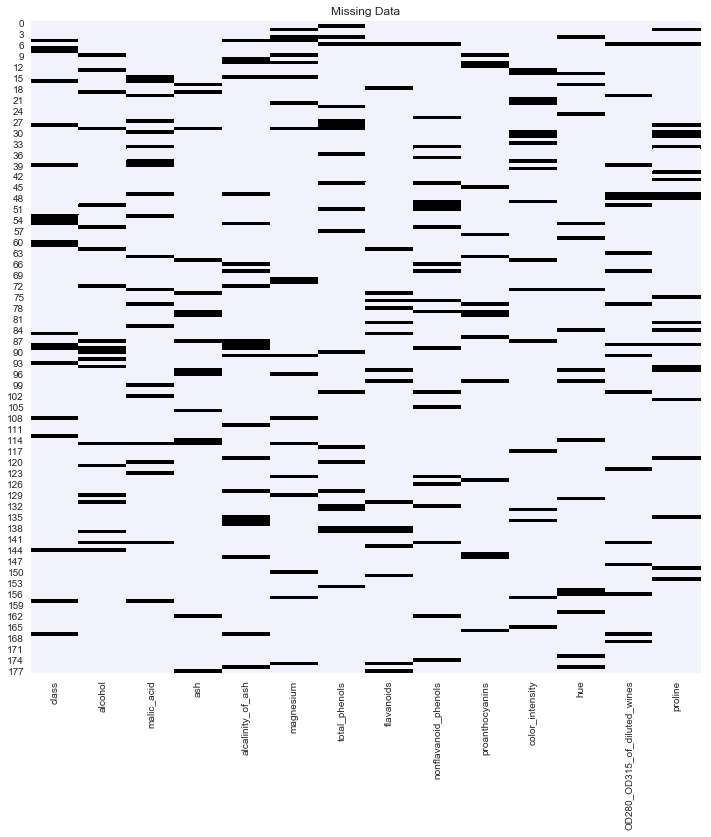

In [5]:
msg_df = missing.get_proportion_missing(df=wines, cols=[], plot=True)

## Get the base descriptive stats

In [6]:
descipt_df = explore.get_base_descriptives(data=wines)

,feature,mean,median,std,min,max,skew
0,alcohol,13.020063,13.050,0.781529,11.41,14.83,-0.019622
1,malic_acid,2.333567,1.870,1.121328,0.74,5.65,0.961129
2,ash,2.361288,2.360,0.277678,1.36,3.23,-0.154238
3,alcalinity_of_ash,19.424359,19.250,3.360921,10.60,30.00,0.217948
4,magnesium,99.578616,98.000,14.214177,70.00,162.00,1.176150
5,total_phenols,2.297006,2.300,0.634179,0.98,3.88,0.138088
6,flavanoids,2.059006,2.210,0.996269,0.34,5.08,-0.050963
7,nonflavanoid_phenols,0.363397,0.340,0.123792,0.13,0.63,0.381712
8,proanthocyanins,1.601227,1.560,0.585492,0.41,3.58,0.508102
9,color_intensity,5.042687,4.640,2.370636,1.28,13.00,0.904052


## Looking at Distributions and Potential Caps

,Feature,plus_2_SD,plus_3_SD,minus_2_SD,minus_3_SD,skew
0,alcohol,14.583122,15.364651,11.457005,10.675476,-0.019622
1,proline,1359.705251,1671.045138,NaN,NaN,0.831338
2,flavanoids,4.051544,5.047813,0.066469,-0.929800,-0.050963


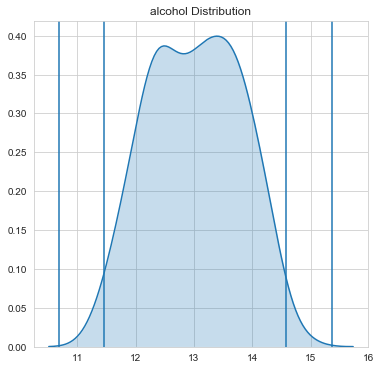

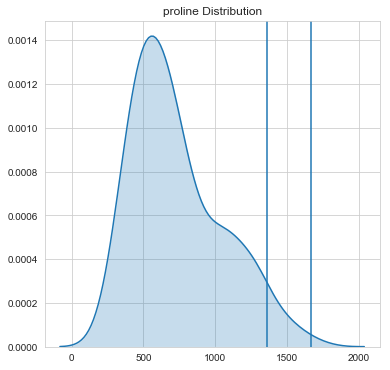

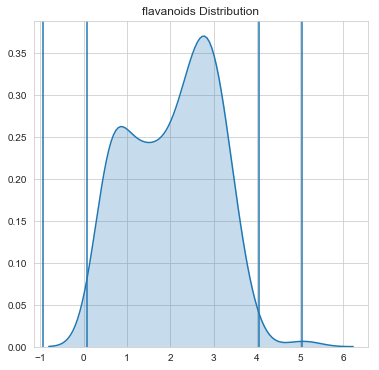

In [7]:
caps_df = distributions.find_caps(data=wines, cols=['alcohol', 'proline', 'flavanoids'], stats=['sd'] ,plot=True)

## Batteries

The run_battery() function allows you to run multiple test by simply calling the explore.run_battery() function. When no tests are passed into the tests parameter all available tests are run

,stat,value
0,n_rows,178.00
1,n_cols,14.00
2,total_memory,20064.00
3,total_percent_missing,10.67


,feature,percent_missing
4,alcalinity_of_ash,12.359551
8,nonflavanoid_phenols,12.359551
2,malic_acid,11.797753
6,total_phenols,11.797753
13,proline,11.797753
0,class,11.235955
1,alcohol,11.235955
5,magnesium,10.674157
10,color_intensity,10.112360
12,OD280_OD315_of_diluted_wines,10.112360


,feature,mean,median,std,min,max,skew
0,alcohol,13.020063,13.050,0.781529,11.41,14.83,-0.019622
1,malic_acid,2.333567,1.870,1.121328,0.74,5.65,0.961129
2,ash,2.361288,2.360,0.277678,1.36,3.23,-0.154238
3,alcalinity_of_ash,19.424359,19.250,3.360921,10.60,30.00,0.217948
4,magnesium,99.578616,98.000,14.214177,70.00,162.00,1.176150
5,total_phenols,2.297006,2.300,0.634179,0.98,3.88,0.138088
6,flavanoids,2.059006,2.210,0.996269,0.34,5.08,-0.050963
7,nonflavanoid_phenols,0.363397,0.340,0.123792,0.13,0.63,0.381712
8,proanthocyanins,1.601227,1.560,0.585492,0.41,3.58,0.508102
9,color_intensity,5.042687,4.640,2.370636,1.28,13.00,0.904052


,Feature,plus_2_SD,plus_3_SD,minus_2_SD,minus_3_SD,skew
0,alcohol,14.583122,15.364651,11.457005,10.675476,-0.019622
1,malic_acid,4.576223,5.697551,NaN,NaN,0.961129
2,ash,2.916645,3.194323,1.805932,1.528254,-0.154238
3,alcalinity_of_ash,26.146201,29.507122,NaN,NaN,0.217948
4,magnesium,128.006971,142.221148,NaN,NaN,1.176150
5,total_phenols,3.565364,4.199543,1.028649,0.394470,0.138088
6,flavanoids,4.051544,5.047813,0.066469,-0.929800,-0.050963
7,nonflavanoid_phenols,0.610982,0.734774,NaN,NaN,0.381712
8,proanthocyanins,2.772211,3.357703,NaN,NaN,0.508102
9,color_intensity,9.783960,12.154596,NaN,NaN,0.904052


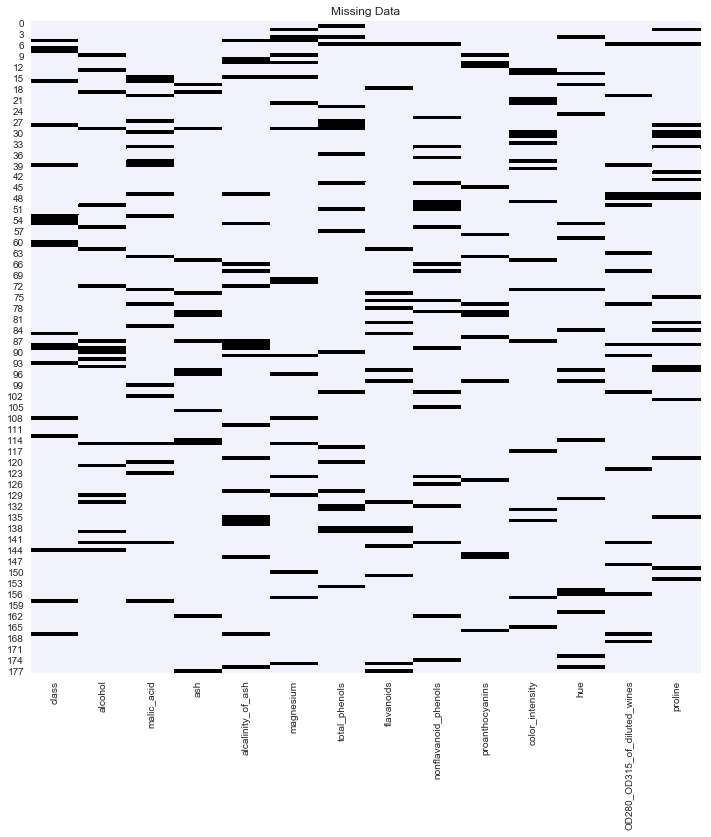

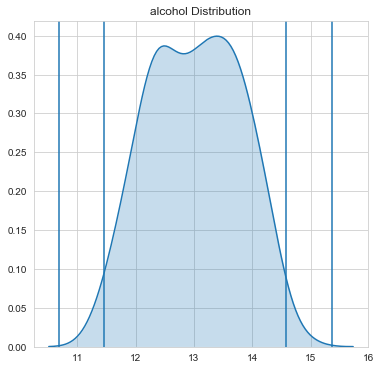

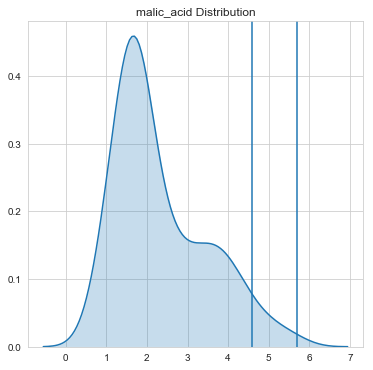

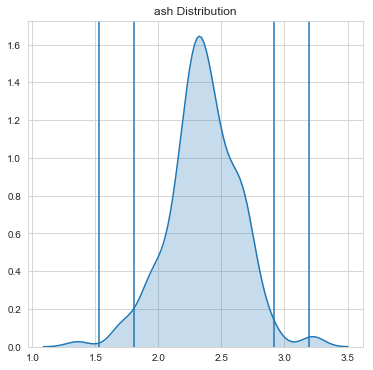

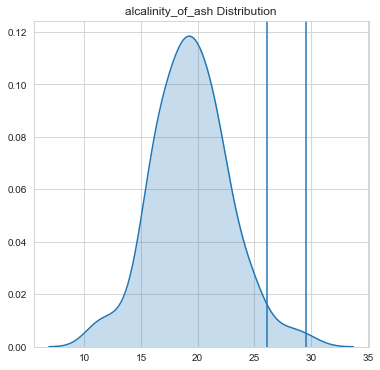

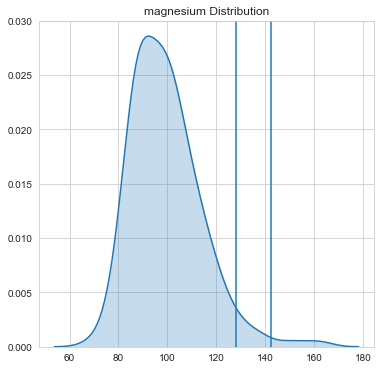

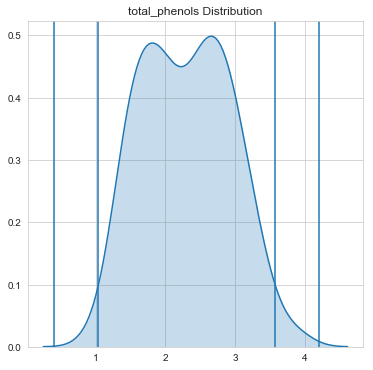

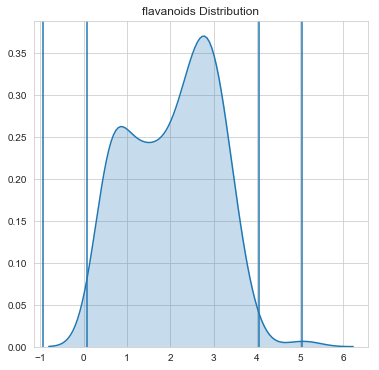

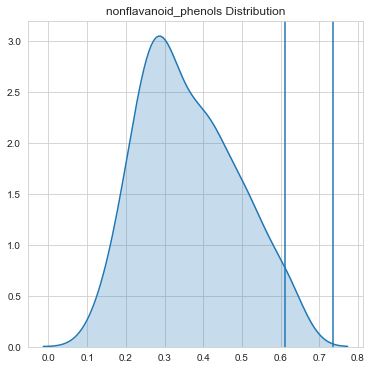

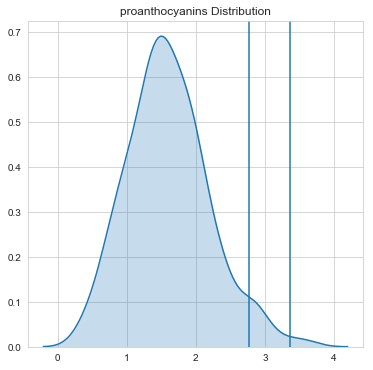

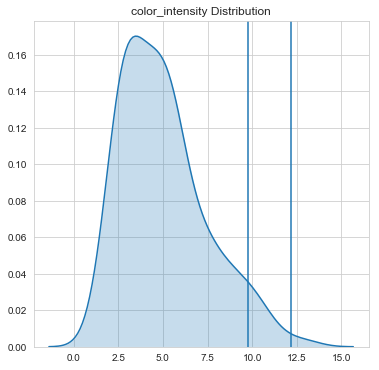

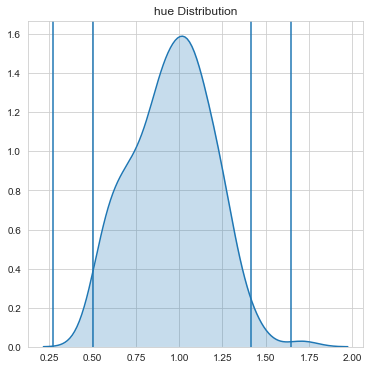

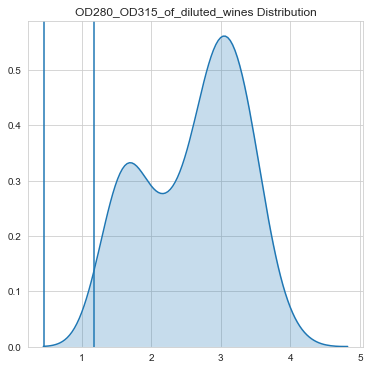

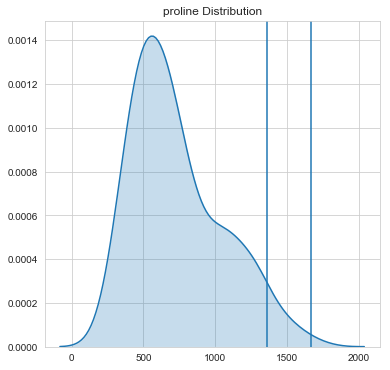

,feature_by_category,count,proportion_samples
0,class_1,50,28.09
1,class_2,63,35.39
2,class_3,45,25.28


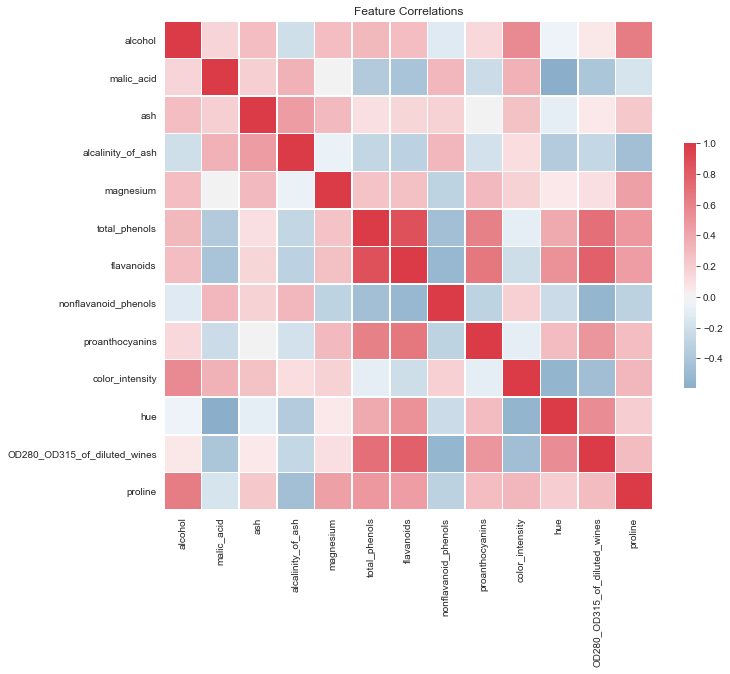

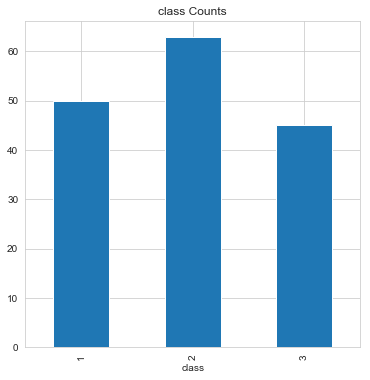

In [8]:
test_dict = explore.run_battery(data=wines
                                , categorical_cols=['class']
                                , continuous_cols=[col for col in wines.columns if col != 'class'])